# Experiments for bijection sandpiles parkfunc

In [39]:
# Load the package...
load("../sorted_sandpile.py")

In [31]:
# Initialize symmetric function stuff...

R = FractionField(QQ['q, t'])      # type: ignore
q,t = R.gens()
poly = 0*q*t

In [ ]:
# Construct the two graphs that should be equivalent...

mu = []
nu = [6]
nu_rev = [nu[len(nu) - i - 1] for i in range(len(nu))]
n = sum(mu) + sum(nu)
k = 2

G1 = Multi_CliqueIndependent_SortedSandpile(mu, nu, k)
G2 = Multi_CliqueIndependent_SortedSandpile(mu + nu_rev, [], k)

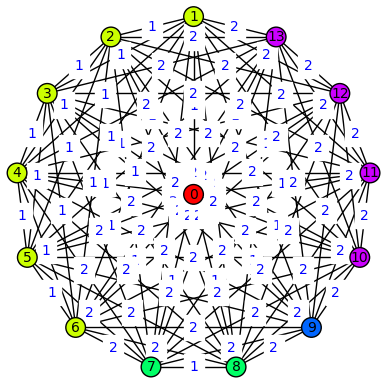

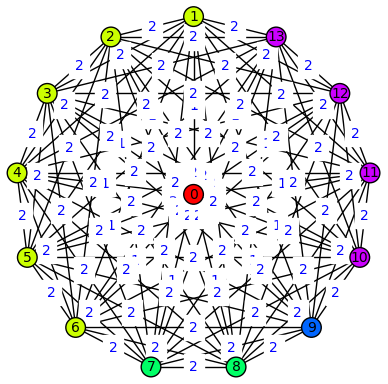

In [5]:
G1.show()
G2.show()

In [11]:
#sortrec1 = G1.sorted_recurrents(option=2)
#sortrec2 = G2.sorted_recurrents(option=2)

In [12]:
poly1 = G1.qt_Polynomial_test()

Configurazione {1: 9, 2: 9, 3: 9, 4: 11, 5: 11, 6: 11}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 8, 2: 8, 3: 9, 4: 10, 5: 10, 6: 10}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 8, 2: 8, 3: 8, 4: 10, 5: 10, 6: 11}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 8, 2: 9, 3: 9, 4: 10, 5: 10, 6: 10}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 7, 2: 7, 3: 9, 4: 9, 5: 9, 6: 9}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 8, 2: 8, 3: 9, 4: 10, 5: 10, 6: 11}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 8, 2: 8, 3: 8, 4: 10, 5: 11, 6: 11}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 7, 2: 7, 3: 7, 4: 9, 5: 9, 6: 11}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 9, 2: 9, 3: 9, 4: 10, 5: 10, 6: 10}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 7, 2: 8, 3: 9, 4: 9, 5: 9, 6: 9}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 8, 2: 9, 3: 9, 4: 10, 5: 10, 6: 11}
Ordine [4, 5, 6, 3, 2, 1]


Configurazione {1: 1, 2: 8, 3: 8, 4: 11, 5: 11, 6: 11}
Ordine [4, 5, 6, 3, 2, 1]


Configurazio

In [ ]:
new_set = []

for conf1 in sortrec1:                      # Implement the correspondence
    conf2 = {}
    conf2 = conf2 | {1:conf1[1] + 0}
    conf2 = conf2 | {2:conf1[2] + 1}
    conf2 = conf2 | {3:conf1[3] + 2}
    conf2 = conf2 | {4:conf1[4] + 3}
    conf2 = conf2 | {5:conf1[5] + 0}
    conf2 = conf2 | {6:conf1[6] + 0}
    conf2 = conf2 | {7:conf1[7] + 0}
    new_set = new_set + [conf2]
    
    config1 = SandpileSortConfig(G1.sandpile_struct, conf1, G1.perm_group, verts=G1.vertices) 
    config2 = SandpileSortConfig(G2.sandpile_struct, conf2, G2.perm_group, verts=G2.vertices)  
    l1 = config1.level()
    d1 = config1.delay()
    l2 = config2.level()
    d2 = config2.delay()
    if (l1 != l2) or (d1 != d2):            # Check if the correspondence works...
        print("Config G1:\t {}\n level(c) = {} \t\t delay(c) = {}".format(conf1, l1, d1))
        print("Config G2:\t {}\n level(c) = {} \t\t delay(c) = {}\n".format(conf2, l2, d2))

# Test for Example 4.1

In [40]:
def tilde_map(mu,nu,config):
    new_conf = {}       # Define new dictionary
    n = sum(mu) + sum(nu)
    i = 0
    for part_nu in nu:
        for j in range(part_nu):
            i += 1
            new_conf = new_conf | {i:config[i]+j}
    for j in range(n-i):
        new_conf = new_conf | {i+j+1:config[i+j+1]}
    return new_conf         # !!!!!! RETURNS A DICTIONARY !!!!!!

# Construct the two graphs that should be equivalent...

mu = [4,1]
nu = [6,2]
nu_rev = [nu[len(nu) - i - 1] for i in range(len(nu))]
n = sum(mu) + sum(nu)
k = 2

G1 = Multi_CliqueIndependent_SortedSandpile(mu, nu, k)
G2 = Multi_CliqueIndependent_SortedSandpile(mu + nu_rev, [], k)

conf1 = {1:4, 2:9, 3:14, 4:17, 5:20, 6:20, 7:16, 8:19, 9:4, 10:25, 11:20, 12:19, 13:8}
conf2 = tilde_map(mu,nu,conf1)

old_conf = SandpileSortConfig(G1.sandpile_struct, conf1, G1.perm_group, verts=G1.vertices)
new_conf = SandpileSortConfig(G2.sandpile_struct, conf2, G2.perm_group, verts=G2.vertices)

print(conf2)

[del1,wtopp1,record1,word1] = old_conf.k_delay_test(check_rec=False)
[del2,wtopp2,record2,word2] = new_conf.k_delay_test(check_rec=False)

{1: 4, 2: 10, 3: 16, 4: 20, 5: 24, 6: 25, 7: 16, 8: 20, 9: 4, 10: 25, 11: 20, 12: 19, 13: 8}


In [41]:
print(wtopp1)
print(wtopp2)
print(record1)
print(record2)

[13, 6, 5, 13, 12, 11, 8, 6, 5, 4, 3, 12, 11, 8, 7, 4, 3, 2, 10, 7, 2, 1, 10, 9, 1, 9]
[13, 6, 5, 13, 12, 11, 8, 6, 5, 4, 3, 12, 11, 8, 7, 4, 3, 2, 10, 7, 2, 1, 10, 9, 1, 9]
[13, -1, -1, -1, -1, -1, -1, 6, 5, -1, -1, -1, -1, 13, 12, 11, -1, -1, 8, -1, 6, 5, 4, 3, -1, -1, -1, 12, 11, -1, -1, 8, 7, -1, -1, 4, 3, 2, -1, -1, -1, -1, 10, -1, -1, 7, -1, -1, -1, -1, 2, 1, -1, -1, -1, 10, 9, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 9, -1, -1, -1, -1, -1, -1, -1, -1]
[13, -1, -1, -1, -1, -1, -1, 6, 5, -1, -1, -1, -1, 13, 12, 11, -1, -1, 8, -1, 6, 5, 4, 3, -1, -1, -1, 12, 11, -1, -1, 8, 7, -1, -1, 4, 3, 2, -1, -1, -1, -1, 10, -1, -1, 7, -1, -1, -1, -1, 2, 1, -1, -1, -1, 10, 9, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 9, -1, -1, -1, -1, -1, -1, -1, -1]


In [42]:
print(word1)

0 & 26 & 21 & 20 & 9 & 5 & 20 & 17 & 21 & 21 & 18 & 15 & 10 & 5\\ 
13 & 14 & 22 & 21 & 10 & 6 & 21 & 18 & \textbf{ 22 } & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
12 & 14 & 22 & 21 & 10 & 6 & 21 & 18 & \textbf{ 22 } & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
11 & 14 & 22 & 21 & 10 & 6 & 21 & 18 & \textbf{ 22 } & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
10 & 14 & 22 & 21 & 10 & 6 & 21 & 18 & \textbf{ 22 } & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
9 & 14 & 22 & 21 & 10 & 6 & 21 & 18 & \textbf{ 22 } & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
8 & 14 & 22 & 21 & 10 & 6 & 21 & 18 & \textbf{ 22 } & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
7 & 14 & 22 & 21 & 10 & 6 & 21 & 18 & \textbf{ 22 } & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
6 & 15 & 23 & 22 & 11 & 7 & 22 & 19 & 15 & \textbf{ 22 } & 19 & 16 & 11 & 6\\ 
5 & 16 & 24 & 23 & 12 & 8 & 23 & 20 & 15 & 15 & 19 & 16 & 11 & 6\\ 
4 & 16 & 24 & 23 & 12 & 8 & 23 & 20 & 15 & 15 & 19 & 16 & 11 & 6\\ 
3 & 16 & 24 & 23 & 12 & 8 & 23 & 20 & 15 & 15 & 19 & 16 & 11 & 6\\ 
2 & 16 & 24 & 23